In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td
import time
import TDMS_MHD as MHD
import pandas as pd
%matplotlib inline

import scipy

mpl.rcParams.update({'font.size': 14})


class VaporTubes(MHD.TDMS,MHD.TDMS_pd):
    def __init__(self, ):
        MHD.TDMS.__init__(self) 
        MHD.TDMS_pd.__init__(self)   
    
def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return idx
    
def exp_fit(x,a)


In [35]:
laserprofile = VaporTubes()
laserprofile.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\2017-10-23")

f10Hz = VaporTubes()
f50Hz = VaporTubes()
p10Hz = VaporTubes()

f10Hz.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\2018-04-05 Power dependence\\Try 1")

f50Hz.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\2018-04-05 Power dependence\\Seqtry2")

p10Hz.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\2018-04-05 Power dependence\\Powermeter\\Chosen\\10Hz")

print(p10Hz.pathnames)

Run15kV_Powermeter_NDF00_seq_500ns_500aq.tdms    C:\Users\aspit\OneDrive\Data\2018-04-05 Power ...
Run15kV_Powermeter_NDF01_seq_500ns_500aq.tdms    C:\Users\aspit\OneDrive\Data\2018-04-05 Power ...
Run15kV_Powermeter_NDF02_seq_500ns_500aq.tdms    C:\Users\aspit\OneDrive\Data\2018-04-05 Power ...
dtype: object


In [37]:
f10Hz.import_data(f10Hz.pathnames['_Run15kV_Rb_NDF00_seq_500ns_500aq.tdms'])
f10Hz.import_data(f10Hz.pathnames['_Run15kV_Rb_NDF01_seq_500ns_500aq.tdms'])
f10Hz.import_data(f10Hz.pathnames['_Run15kV_Rb_NDF02_seq_500ns_500aq_newbg_2.tdms'])
NDF00_10Hz = f10Hz.imports[f10Hz.pathnames['_Run15kV_Rb_NDF00_seq_500ns_500aq.tdms']]
NDF01_10Hz = f10Hz.imports[f10Hz.pathnames['_Run15kV_Rb_NDF01_seq_500ns_500aq.tdms']]
NDF02_10Hz = f10Hz.imports[f10Hz.pathnames['_Run15kV_Rb_NDF02_seq_500ns_500aq_newbg_2.tdms']]

p10Hz.import_data(p10Hz.pathnames['Run15kV_Powermeter_NDF00_seq_500ns_500aq.tdms'])
p10Hz.import_data(p10Hz.pathnames['Run15kV_Powermeter_NDF01_seq_500ns_500aq.tdms'])
p10Hz.import_data(p10Hz.pathnames['Run15kV_Powermeter_NDF02_seq_500ns_500aq.tdms'])
p_NDF00_10Hz = p10Hz.imports[p10Hz.pathnames['Run15kV_Powermeter_NDF00_seq_500ns_500aq.tdms']]
p_NDF01_10Hz = p10Hz.imports[p10Hz.pathnames['Run15kV_Powermeter_NDF01_seq_500ns_500aq.tdms']]
p_NDF02_10Hz = p10Hz.imports[p10Hz.pathnames['Run15kV_Powermeter_NDF02_seq_500ns_500aq.tdms']]

filepath_laser = laserprofile.pathnames[0]
laserprofile.import_data(filepath_laser)
file_laser = laserprofile.imports[filepath_laser]

In [38]:
p_NDF00_10Hz.groups()

['Meter 1', 'Meter 2']

In [47]:
#Pull in relevant groups

offset_time = 870

NDF00_10Hz_time = f10Hz.get_data_pdframe(NDF00_10Hz,'Gate Delay Arrays')
NDF00_10Hz_time = NDF00_10Hz_time['GateDelay_1'].as_matrix()
NDF00_10Hz_time = NDF00_10Hz_time[~np.isnan(NDF00_10Hz_time)]
NDF00_10Hz_time = NDF00_10Hz_time - offset_time
NDF00_10Hz_data = f10Hz.get_data_pdframe(NDF00_10Hz,'Raw_1')
NDF00_10Hz_power = p10Hz.get_data_pdframe(p_NDF00_10Hz,'Meter 1')
NDF00_10Hz_power = NDF00_10Hz_power['Power'].as_matrix()

NDF01_10Hz_time = f10Hz.get_data_pdframe(NDF01_10Hz,'Gate Delay Arrays')
NDF01_10Hz_time = NDF01_10Hz_time['GateDelay_1'].as_matrix()
NDF01_10Hz_time = NDF01_10Hz_time[~np.isnan(NDF01_10Hz_time)]
NDF01_10Hz_time = NDF01_10Hz_time - offset_time
NDF01_10Hz_data = f10Hz.get_data_pdframe(NDF01_10Hz,'Raw_1')
NDF01_10Hz_power = p10Hz.get_data_pdframe(p_NDF01_10Hz,'Meter 1')
NDF01_10Hz_power = NDF01_10Hz_power['Power'].as_matrix()

NDF02_10Hz_time = f10Hz.get_data_pdframe(NDF02_10Hz,'Gate Delay Arrays')
NDF02_10Hz_time = NDF02_10Hz_time['GateDelay_1'].as_matrix()
NDF02_10Hz_time = NDF02_10Hz_time[~np.isnan(NDF02_10Hz_time)]
NDF02_10Hz_time = NDF02_10Hz_time - offset_time
NDF02_10Hz_data = f10Hz.get_data_pdframe(NDF02_10Hz,'Raw_1')
NDF02_10Hz_power = p10Hz.get_data_pdframe(p_NDF02_10Hz,'Meter 1')
NDF02_10Hz_power = NDF02_10Hz_power['Power'].as_matrix()

wl = f10Hz.get_data_pdframe(NDF00_10Hz,'Wavelength Array')
wavelength = wl['Wavelength_1'].as_matrix()

laser_common = laserprofile.get_data_pdframe(file_laser,'Raw')
laser_data = laserprofile.get_data_pdframe(file_laser,'Average')
laser_time = laser_common['Time1']
laser_data = laser_data['Mean']




laser_time_off = laser_time - offset_time

#timearrays = Run3.get_data_pdframe(file1,'Gate Delay Arrays')

#df1 = Run3.get_data_pdframe(file1,'Raw_Capture_1')


In [48]:
print(len(NDF02_10Hz_power))
print(len(NDF02_10Hz_data.columns)*500)
print(NDF01_10Hz_data)

2936
3500
      Frame_0  Frame_1  Frame_2  Frame_3  Frame_4  Frame_5  Frame_6  Frame_7  \
0       199.0   8238.0    -40.0    232.0    348.0   -164.0     67.0     25.0   
1       176.0   8102.0   -490.0    191.0    230.0    -13.0   -139.0     31.0   
2        15.0   9018.0    -26.0    172.0    -51.0    488.0    157.0    344.0   
3       633.0  11806.0     43.0     39.0    113.0   -186.0   -144.0    -18.0   
4       270.0  13007.0      0.0    101.0    508.0    212.0     93.0    348.0   
5        16.0  11859.0    363.0     18.0    173.0    283.0   -179.0    -60.0   
6       595.0  11605.0    798.0    211.0    345.0    657.0    344.0     18.0   
7       950.0   9583.0   1164.0    442.0    655.0    857.0    -42.0    492.0   
8      -259.0   6936.0    -81.0     45.0   -267.0    135.0    176.0     43.0   
9       404.0   7937.0     23.0    113.0    356.0    465.0     18.0     86.0   
10      -43.0   9142.0    461.0    -82.0     64.0    314.0   -318.0     23.0   
11      -55.0  10409.0   -443.

In [6]:
idx_peak1_l = find_nearest(wavelength,778)
idx_peak1_r = find_nearest(wavelength,781.5)

idx_peak2_l = find_nearest(wavelength,793)
idx_peak2_r = find_nearest(wavelength,797)

wavelength_peak1 = wavelength[idx_peak1_l:idx_peak1_r]
wavelength_peak2 = wavelength[idx_peak2_l:idx_peak2_r]

NDF00_10Hz_data_p1 = NDF00_10Hz_data[idx_peak1_l:idx_peak1_r]
NDF00_10Hz_data_p2 = NDF00_10Hz_data[idx_peak2_l:idx_peak2_r]

NDF01_10Hz_data_p1 = NDF01_10Hz_data[idx_peak1_l:idx_peak1_r]
NDF01_10Hz_data_p2 = NDF01_10Hz_data[idx_peak2_l:idx_peak2_r]

NDF02_10Hz_data_p1 = NDF02_10Hz_data[idx_peak1_l:idx_peak1_r]
NDF02_10Hz_data_p2 = NDF02_10Hz_data[idx_peak2_l:idx_peak2_r]

In [7]:
print(wavelength_peak1)
print(wavelength_peak2)

[ 778.01499574  778.13870284  778.26240682  778.38610769  778.50980543
  778.63350005  778.75719155  778.88087994  779.0045652   779.12824734
  779.25192635  779.37560225  779.49927502  779.62294467  779.74661119
  779.87027459  779.99393487  780.11759202  780.24124605  780.36489695
  780.48854472  780.61218936  780.73583088  780.85946927  780.98310454
  781.10673667  781.23036568  781.35399155]
[ 792.96078825  793.08411483  793.20743824  793.33075848  793.45407555
  793.57738945  793.70070017  793.82400771  793.94731209  794.07061329
  794.19391131  794.31720616  794.44049783  794.56378633  794.68707165
  794.8103538   794.93363276  795.05690855  795.18018116  795.30345059
  795.42671685  795.54997992  795.67323981  795.79649653  795.91975006
  796.04300041  796.16624758  796.28949156  796.41273237  796.53596999
  796.65920443  796.78243568  796.90566375]


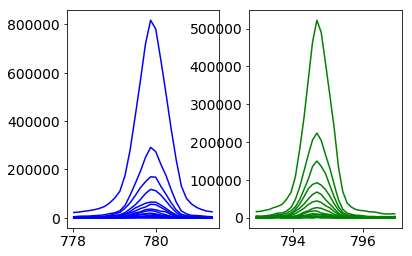

In [8]:
fig, ax1 = plt.subplots(1,2)
ln1 = ax1[0].plot(wavelength_peak1,NDF00_10Hz_data_p1, 'b', label = '780 nm peak_00')
ln2 = ax1[1].plot(wavelength_peak2,NDF00_10Hz_data_p2, 'g', label = '795 nm peak_00')

In [9]:
laser_data_norm = laser_data/laser_data.max()

NDF00_10Hz_data_p1_avg = []
NDF00_10Hz_data_p2_avg = []

for frame in NDF00_10Hz_data_p1:
    maximum = NDF00_10Hz_data_p1[frame].max()
    NDF00_10Hz_data_p1_avg = np.append(NDF00_10Hz_data_p1_avg, maximum)
    
for frame in NDF00_10Hz_data_p2:
    maximum = NDF00_10Hz_data_p2[frame].max()
    NDF00_10Hz_data_p2_avg = np.append(NDF00_10Hz_data_p2_avg, maximum)

NDF00_10Hz_data_p1_avg_norm = NDF00_10Hz_data_p1_avg/NDF00_10Hz_data_p1_avg.max()
NDF00_10Hz_data_p2_avg_norm = NDF00_10Hz_data_p2_avg/NDF00_10Hz_data_p2_avg.max()



NDF01_10Hz_data_p1_avg = []
NDF01_10Hz_data_p2_avg = []

for frame in NDF01_10Hz_data_p1:
    maximum = NDF01_10Hz_data_p1[frame].max()
    NDF01_10Hz_data_p1_avg = np.append(NDF01_10Hz_data_p1_avg, maximum)
    
for frame in NDF01_10Hz_data_p2:
    maximum = NDF01_10Hz_data_p2[frame].max()
    NDF01_10Hz_data_p2_avg = np.append(NDF01_10Hz_data_p2_avg, maximum)

NDF01_10Hz_data_p1_avg_norm = NDF01_10Hz_data_p1_avg/NDF01_10Hz_data_p1_avg.max()
NDF01_10Hz_data_p2_avg_norm = NDF01_10Hz_data_p2_avg/NDF01_10Hz_data_p2_avg.max()


NDF02_10Hz_data_p1_avg = []
NDF02_10Hz_data_p2_avg = []

for frame in NDF02_10Hz_data_p1:
    maximum = NDF02_10Hz_data_p1[frame].max()
    NDF02_10Hz_data_p1_avg = np.append(NDF02_10Hz_data_p1_avg, maximum)
    
for frame in NDF02_10Hz_data_p2:
    maximum = NDF02_10Hz_data_p2[frame].max()
    NDF02_10Hz_data_p2_avg = np.append(NDF02_10Hz_data_p2_avg, maximum)

NDF02_10Hz_data_p1_avg_norm = NDF02_10Hz_data_p1_avg/NDF02_10Hz_data_p1_avg.max()
NDF02_10Hz_data_p2_avg_norm = NDF02_10Hz_data_p2_avg/NDF02_10Hz_data_p2_avg.max()

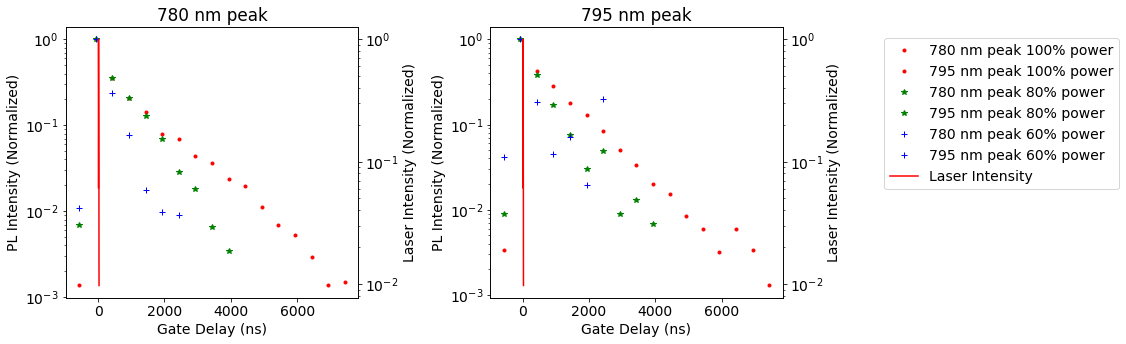

In [12]:
from matplotlib.ticker import ScalarFormatter


fig, ax1 = plt.subplots(1,2,figsize=(12,5))
ln1 = ax1[0].plot(NDF00_10Hz_time, NDF00_10Hz_data_p1_avg_norm, 'r.', label = '780 nm peak 100% power')
ln2 = ax1[1].plot(NDF00_10Hz_time, NDF00_10Hz_data_p2_avg_norm, 'r.', label = '795 nm peak 100% power')
ln3 = ax1[0].plot(NDF01_10Hz_time, NDF01_10Hz_data_p1_avg_norm, 'g*', label = '780 nm peak 80% power')
ln4 = ax1[1].plot(NDF01_10Hz_time, NDF01_10Hz_data_p2_avg_norm, 'g*', label = '795 nm peak 80% power')
ln5 = ax1[0].plot(NDF02_10Hz_time, NDF02_10Hz_data_p1_avg_norm, 'b+', label = '780 nm peak 60% power')
ln6 = ax1[1].plot(NDF02_10Hz_time, NDF02_10Hz_data_p2_avg_norm, 'b+', label = '795 nm peak 60% power')

for ax in ax1:
    ax.set_xlabel("Gate Delay (ns)")
    # Make the y-axis label, ticks and tick labels match the line color.
    ax.set_ylabel("PL Intensity (Normalized)")
    ax.tick_params('y')
    ax.loglog
    #ax.set_aspect(5)
    ax2 = ax.twinx()
    ln7= ax2.plot(laser_time_off, laser_data_norm, 'r', label = 'Laser Intensity')
    ax2.set_ylabel("Laser Intensity (Normalized)")
    ax2.tick_params('y')
    ax2.set_yscale('log')
    ax.set_yscale('log')

ax1[0].set_title('780 nm peak')
ax1[1].set_title('795 nm peak')



#plt.title("Rubidium Vapor PL")
fig.tight_layout()

lns = ln1+ln2+ln3+ln4+ln5+ln6+ln7
labs = [l.get_label() for l in lns]
ax1[0].legend(lns, labs, loc=(2.8,0.4))



#ax2.yaxis.set_major_formatter(ScalarFormatter())

plt.show()



NameError: name 'time_off' is not defined

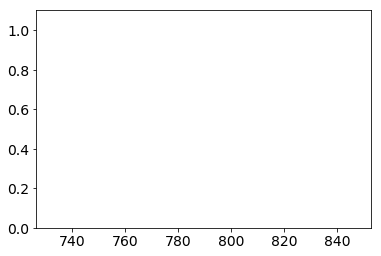

In [11]:

"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt


from matplotlib import animation, rc
from IPython.display import HTML

xs = wavelength

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(xs[0], xs[-1]), ylim=(0, 1.1))

line, = ax.plot([], [], lw=2)

time_template = 'Gate Delay = %.1fns'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)



# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    time_text.set_text('')
    ax.set_ylabel("Normalized Emission Intensity (a.u.)")
    ax.set_xlabel("Wavelength (nm)") 
    return line,

# animation function.  This is called sequentially
def animate(i):
    y = df1.iloc[:,i].as_matrix()
    y = y/data_peak1.max().max()
    line.set_data(xs, y)
    time_text.set_text(time_template % time_off[i])
    return line, time_text



# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(time_off), interval=247.5, blit=True)


#TML(anim.to_html5_video())

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

anim


In [ ]:
print(time_off)